In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

DATA_FOLDER = "../../../../Documents/MLBData/"
print(DATA_FOLDER)

def load_batting_data(fileName,data_path = DATA_FOLDER):
    csv_path = os.path.join(data_path,fileName)
    return pd.read_csv(csv_path)


advanced = load_batting_data('2018-BattingAdvanced(CSV).csv')
advanced = advanced[advanced['PA'] >= 50]
advanced.drop(columns=['Tm'], inplace=True)

standard = load_batting_data('2018-BattingStandard(CSV).csv')
standard = standard[standard['PA'] >= 50]
standard.drop(columns=['Pos Summary', 'Tm', 'Lg', 'Name', 'Age', 'PA'], inplace=True)


../../../../Documents/MLBData/


In [9]:
advanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 0 to 990
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             551 non-null    object 
 1   Age              550 non-null    float64
 2   PA               551 non-null    int64  
 3   rOBA             551 non-null    float64
 4   Rbat+            551 non-null    float64
 5   BAbip            551 non-null    float64
 6   ISO              551 non-null    float64
 7   HR%              551 non-null    object 
 8   SO%              551 non-null    object 
 9   BB%              551 non-null    object 
 10  EV               551 non-null    float64
 11  HardH%           551 non-null    object 
 12  LD%              551 non-null    object 
 13  GB%              551 non-null    object 
 14  FB%              551 non-null    object 
 15  GB/FB            551 non-null    float64
 16  Pull%            551 non-null    object 
 17  Cent%           

In [10]:
standard.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 0 to 1271
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   G                551 non-null    int64  
 1   AB               551 non-null    int64  
 2   R                551 non-null    int64  
 3   H                551 non-null    int64  
 4   2B               551 non-null    int64  
 5   3B               551 non-null    int64  
 6   HR               551 non-null    int64  
 7   RBI              551 non-null    int64  
 8   SB               551 non-null    int64  
 9   CS               551 non-null    int64  
 10  BB               551 non-null    int64  
 11  SO               551 non-null    int64  
 12  BA               551 non-null    float64
 13  OBP              551 non-null    float64
 14  SLG              551 non-null    float64
 15  OPS              551 non-null    float64
 16  OPS+             550 non-null    float64
 17  TB             

In [11]:
# standard["PA"].value_counts()

HR%
SO%
BB%
HardH%
LD%
GB%
FB%
Pull%
Cent%
Oppo%
RS%
SB%
XBT%


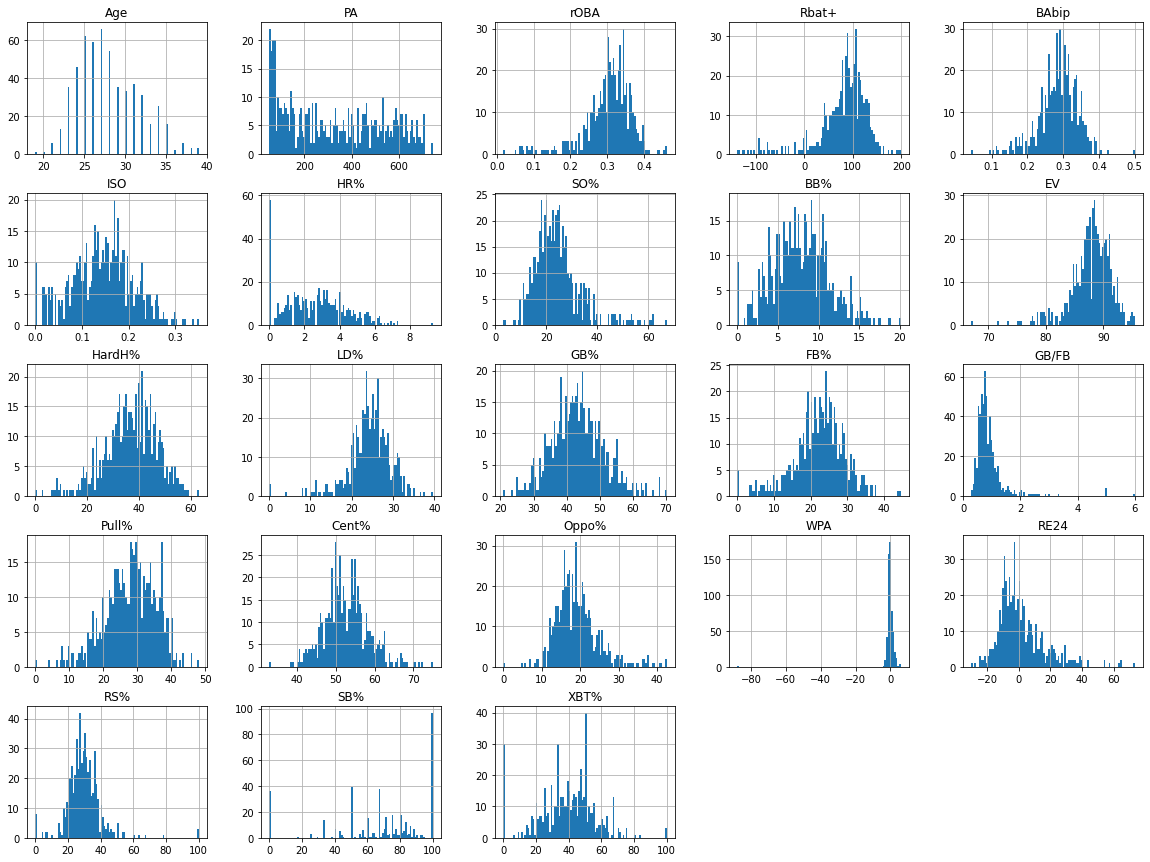

In [12]:
percentValues = ['HR%', 'SO%','BB%','HardH%', 'LD%', 'GB%','FB%', 'Pull%', 'Cent%', 'Oppo%', 'RS%', 'SB%', 'XBT%']
for value in percentValues:
    print(value)
    advanced[value] = advanced[value].apply(lambda x: float(x.strip('%')) if isinstance(x, str) else x)

advanced.hist(bins=100, figsize =(20, 15))
plt.show()

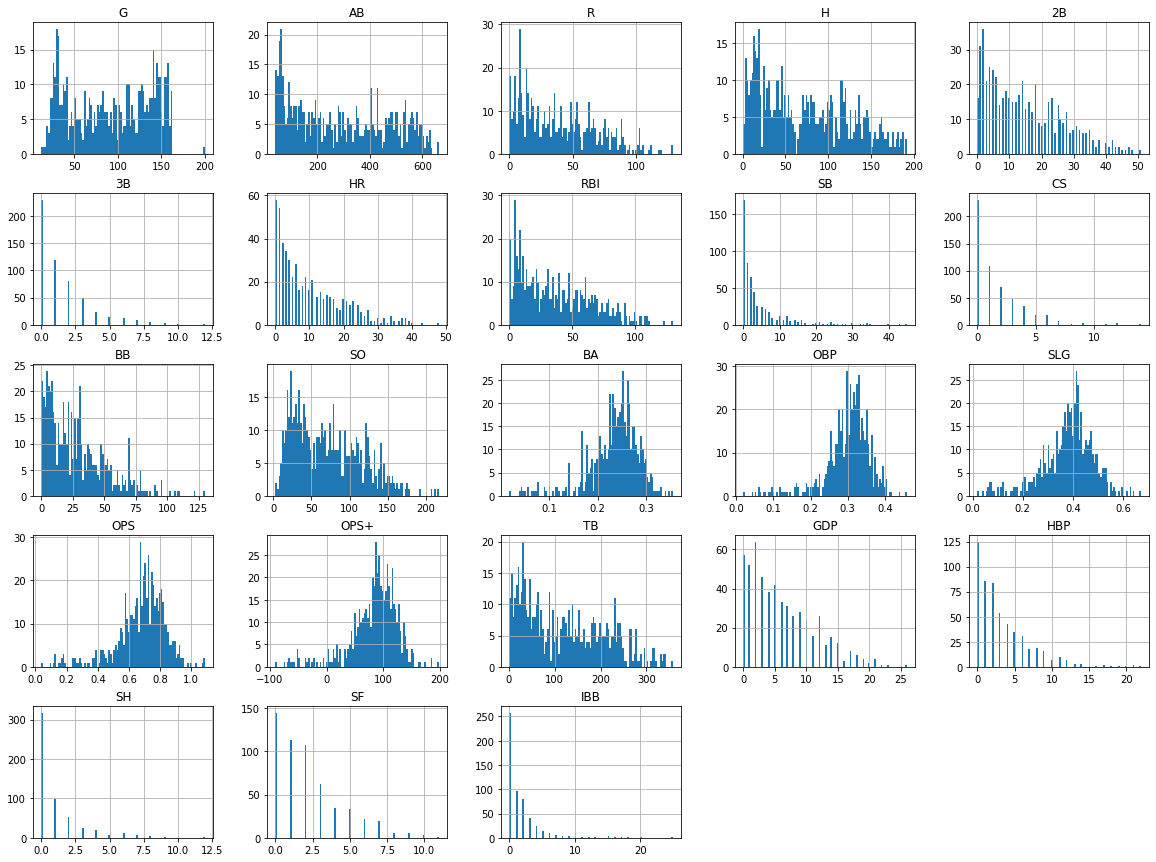

In [13]:
standard.hist(bins=100, figsize=(20,15))
plt.show()

In [14]:
total_stats = pd.merge(advanced, standard, on='Name-additional', how='outer')

In [15]:
total_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 0 to 550
Data columns (total 49 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             551 non-null    object 
 1   Age              550 non-null    float64
 2   PA               551 non-null    int64  
 3   rOBA             551 non-null    float64
 4   Rbat+            551 non-null    float64
 5   BAbip            551 non-null    float64
 6   ISO              551 non-null    float64
 7   HR%              551 non-null    float64
 8   SO%              551 non-null    float64
 9   BB%              551 non-null    float64
 10  EV               551 non-null    float64
 11  HardH%           551 non-null    float64
 12  LD%              551 non-null    float64
 13  GB%              551 non-null    float64
 14  FB%              551 non-null    float64
 15  GB/FB            551 non-null    float64
 16  Pull%            551 non-null    float64
 17  Cent%           